In [20]:
from scipy import stats as scpst
import scipy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Importance sampling

Two problems:
1. compute some simple known integral
1. copmute probability of some rare event

### Monte Carlo integration

An unbiased estimator for $$I = \int_0^\pi \sin(x) dx $$ is $$\hat{I}_n = \frac{1}{n} \sum_{i=1}^n \sin(x_i) \ \ \ \ \textrm{where} \ \ \ \ x_i \sim \mathcal{U}(0, \pi)$$

WHY is the above statement true? What is the variance of such an estimator?

Using the ideas from importance sampling, a "better" estimator, i.e., one with smaller variance?

Firstly, some visualizations, to motivate what will follow.

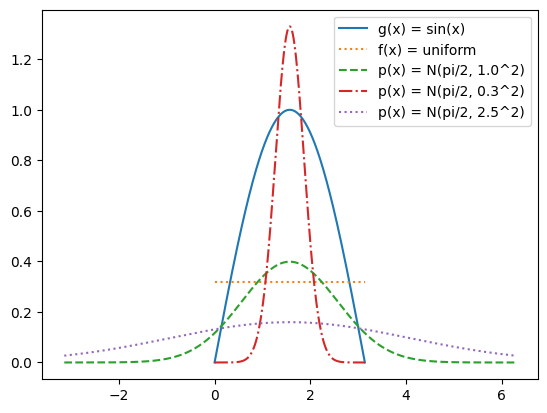

In [21]:
xgrid = np.linspace(0, np.pi, 500)
xgrid1 = np.linspace(-np.pi, 2*np.pi, 500)

plt.plot(xgrid, np.sin(xgrid), label='g(x) = sin(x)')
plt.plot(xgrid, xgrid*0.0 + 1.0/np.pi, label='f(x) = uniform', ls=":")
plt.plot(xgrid1, scpst.norm.pdf(xgrid1, loc=np.pi/2, scale=1.0), label='p(x) = N(pi/2, 1.0^2)', ls="--")
plt.plot(xgrid, scpst.norm.pdf(xgrid, loc=np.pi/2, scale=0.3), label='p(x) = N(pi/2, 0.3^2)', ls="-.")
plt.plot(xgrid1, scpst.norm.pdf(xgrid1, loc=np.pi/2, scale=2.5), label='p(x) = N(pi/2, 2.5^2)', ls=":", ms=0.5)
plt.legend()


In [22]:
ntrials = 1000
nsmp = 100

In [23]:
from scipy.integrate import quad
def integrand(x):
    return np.sin(x)
I = quad(integrand, 0, np.pi)
I

(2.0, 2.220446049250313e-14)

In [24]:
smp1 = scpst.uniform.rvs(loc = 0, scale = np.pi, size = nsmp)
print(f"An estimate is {np.average(np.sin(smp1))}, but we haven't calculated the associated uncertainty")

An estimate is 0.6790723603280685, but we haven't calculated the associated uncertainty


In [25]:
estens = np.zeros(ntrials)
dist = scpst.uniform(loc = 0.0, scale = np.pi)

for ii in range(ntrials):
    estens[ii] = np.average(np.sin(dist.rvs(size = nsmp)))

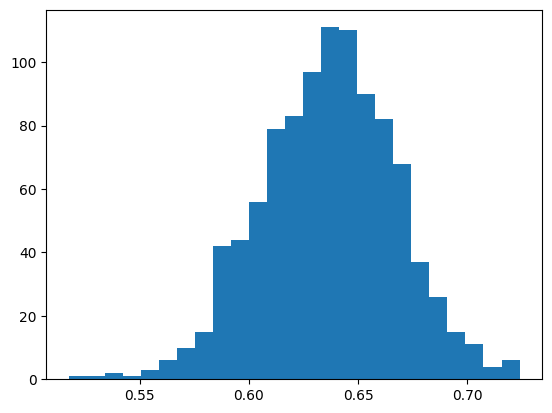

In [26]:
hst = plt.hist(estens, 25)

### Importance sampling Monte Carlo estimate

We now use two different Gaussians as importance sampling distribution.

Remember that we need to associate a "weight" which is equal to the ratio of the density $f(y_i)$ that we want to sample and the density $p(y_i)$ which is what we sample from

#### Gaussian with density close to the product $g(x) f(x)$

In [27]:
estensis1 = np.zeros(ntrials)
isdist1 = scpst.norm(loc = np.pi/2, scale = 1.0)

for ii in range(ntrials):
    smp = isdist1.rvs(size = nsmp)
    estensis1[ii] = np.average(np.sin(smp), weights = dist.pdf(smp) / isdist1.pdf(smp))

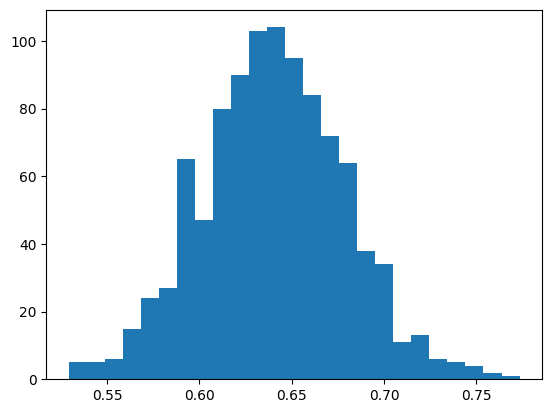

In [28]:
hst1 = plt.hist(estensis1, 25)

In [29]:
estensis11 = np.zeros(ntrials)
isdist1 = scpst.norm(loc = np.pi/2, scale = 1.0)

for ii in range(ntrials):
    smp = isdist1.rvs(size = nsmp)
    estensis11[ii] = np.average(np.sin(smp), weights = 1.0 / isdist1.pdf(smp))
    #### this is INCORRECT!!! WHY?????

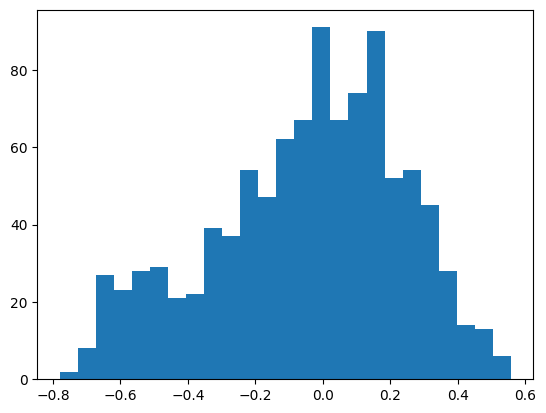

In [30]:
hst11 = plt.hist(estensis11, 25)

#### Gaussian with density NOT close to the product $g(x) f(x)$

In fact, it does not satisfy (numerically) the required condition. Which condition?

In [31]:
estensis2 = np.zeros(ntrials)
isdist2 = scpst.norm(loc = np.pi/2, scale = 0.3)

for ii in range(ntrials):
    smp = isdist2.rvs(size = nsmp)
    estensis2[ii] = np.average(np.sin(smp), weights = dist.pdf(smp) / isdist2.pdf(smp))

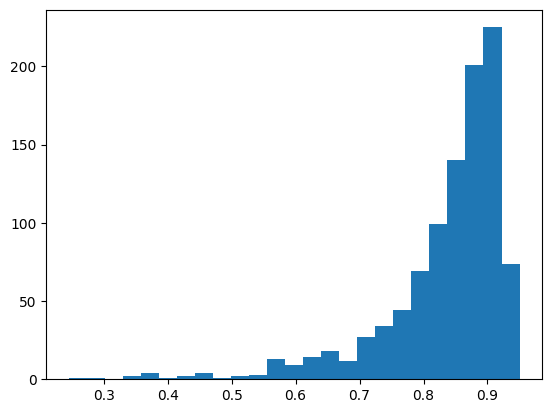

In [32]:
hst2 = plt.hist(estensis2, 25)

#### Gaussian with density NOT close to the product $g(x) f(x)$

But this is not close in a very different way!

In [33]:
estensis3 = np.zeros(ntrials)
isdist3 = scpst.norm(loc = np.pi/2, scale = 3.0)

for ii in range(ntrials):
    smp = isdist3.rvs(size = nsmp)
    estensis3[ii] = np.average(np.sin(smp), weights = dist.pdf(smp) / isdist3.pdf(smp))

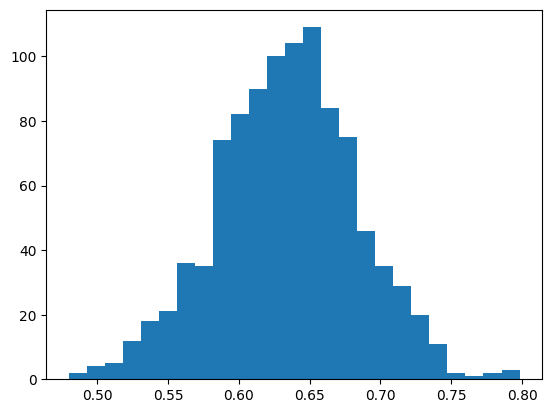

In [34]:
hst3 = plt.hist(estensis3, 25)

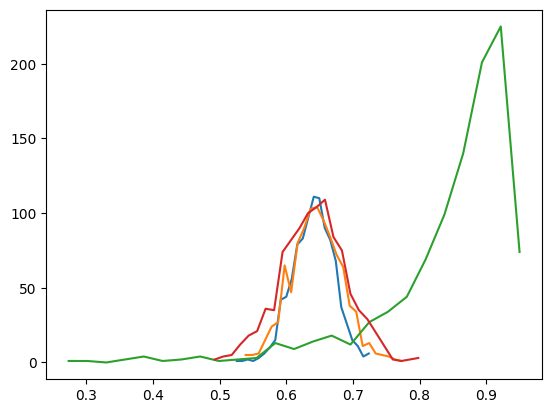

In [35]:
plt.plot(hst[1][1:], hst[0])
plt.plot(hst1[1][1:], hst1[0])
plt.plot(hst2[1][1:], hst2[0])
plt.plot(hst3[1][1:], hst3[0])
#plt.legend()


## Question to solve together:

Compute the p-value using Monte Carlo sampling and the importance sampling! I.e. find estimators for $p = 1 - \Phi(\alpha)$.